In [455]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Lending Club

In [456]:
data = pd.read_csv('../Datasets/LoanStats3a.csv')

In [457]:
dta = []
for i, j in enumerate(data.index):
    if i > 0:
        dta.append(list(j))

In [458]:
df = pd.DataFrame(dta, columns = list(data.index[0]) )

In [267]:
ls = []
for i in df.columns:
    if 1.0*sum(df[i].notnull())/len(df[i]) < .8:
        #print("{} percentage: {}".format(i, 1.0*sum(df[i].notnull())/len(df[i])))
        ls.append(i)
        del df[i]

### Let's look at the data

In [462]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,Jan-2015,171.62,NaN,Jan-2015,0,NaN,1,INDIVIDUAL,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,Apr-2013,119.66,NaN,Sep-2013,0,NaN,1,INDIVIDUAL,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,Jun-2014,649.91,NaN,Oct-2015,0,NaN,1,INDIVIDUAL,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,Jan-2015,357.48,NaN,Jan-2015,0,NaN,1,INDIVIDUAL,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,Oct-2015,67.79,Nov-2015,Oct-2015,0,NaN,1,INDIVIDUAL,NaN,NaN


### What do we think is bad?

In [464]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Late (31-120 days)',
       'In Grace Period', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy.  Status:Current',
       'Does not meet the credit policy.  Status:Charged Off',
       'Does not meet the credit policy.  Status:Fully Paid'], dtype=object)

In [465]:
good = ['Fully Paid','Current']
bad = ['Charged Off','Late (31-120 days)','Late (16-30 days)','Default']

### What could be useful? Let's encode

In [467]:
month = [i if type(i) == float else i[:-5] for i in df['issue_d']]
year = [i if type(i) == float else float(i[-4:]) for i in df['issue_d']]
revol_util = [i if type(i) == float else float(i[:-1]) for i in df['revol_util']] 

In [468]:
df['month'] = month
df['year'] = year
df['revol_util'] = revol_util

In [469]:
label = [1 if i in bad else 0 if i in good else -1 for i in df['loan_status'] ]
df['label'] = label

In [470]:
df.shape

(42538, 58)

In [471]:
tmp = df[(df['label'] == 0) | (df['label'] == 1)]
dataset = tmp[tmp['year'] < 2012]

In [472]:
dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,month,year,label
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,Jan-2015,0,NaN,1,INDIVIDUAL,NaN,NaN,Dec,2011,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,Sep-2013,0,NaN,1,INDIVIDUAL,NaN,NaN,Dec,2011,1
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,Oct-2015,0,NaN,1,INDIVIDUAL,NaN,NaN,Dec,2011,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,Jan-2015,0,NaN,1,INDIVIDUAL,NaN,NaN,Dec,2011,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,Oct-2015,0,NaN,1,INDIVIDUAL,NaN,NaN,Dec,2011,0


In [473]:
dataset[['emp_length', 'home_ownership','earliest_cr_line']]

dataset['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a'], dtype=object)

In [300]:
dataset['years_since_earliest_cr'] = np.array(dataset['year'])-np.array([i if type(i) == float else float(i[-4:]) for i in dataset['earliest_cr_line']])
dataset['is_renter'] = dataset['home_ownership']== 'RENT'

In [302]:
temp = pd.get_dummies(dataset, columns = ['emp_length'])

In [303]:
temp.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,emp_length_n/a
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,0,0,0,0,0,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,0,0,0,0,0,0,0,0,1,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,0,0,0,0,0,0,0,0,0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,0,0,0,0,0,0,0,0,0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,0,0,0,0,0,0,0,0,0,0


In [307]:
X = temp[[
'years_since_earliest_cr',
'is_renter',
'dti',    
'pub_rec',       
'annual_inc',  
'open_acc',
'inq_last_6mths',  
'revol_bal',
'revol_util', 
'total_acc',
'delinq_2yrs',
'collections_12_mths_ex_med',      
'emp_length_1 year',
'emp_length_10+ years',
'emp_length_2 years',
'emp_length_3 years',
'emp_length_4 years',
'emp_length_5 years',
'emp_length_6 years',
'emp_length_7 years',
'emp_length_8 years',
'emp_length_9 years',
'emp_length_< 1 year',
'emp_length_n/a']]

y = temp['label']

In [359]:
X = X.fillna(value = 0)

In [360]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [365]:
from sklearn.ensemble import RandomForestClassifier

features = [
'years_since_earliest_cr',
 'is_renter',
 'dti',
 'pub_rec',
 'annual_inc',
 'emp_length_1 year',
 'emp_length_10+ years',
 'emp_length_2 years',
 'emp_length_3 years',
 'emp_length_4 years',
 'emp_length_5 years',
 'emp_length_6 years',
 'emp_length_7 years',
 'emp_length_8 years',
 'emp_length_9 years',
 'emp_length_< 1 year',
 'emp_length_n/a',
 'open_acc',
 'inq_last_6mths',
 'revol_bal',
 'total_acc',
 'delinq_2yrs'
]

rgr = RandomForestClassifier(random_state= 1)
rgr.fit(X_train[features].values, y_train)
y_pred = rgr.predict(X_test[features].values)

In [367]:
1.0*sum(y_pred == y_test)/len(y_test)

0.8557479363801087

# Prostate Cancer

In [368]:
data = pd.read_csv('../Datasets/ProstateCancer.csv')

In [369]:
del data['Unnamed: 0']
data.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


### Split Training and Testing

In [370]:
train = data[data['train'] == 'T']
test = data[data['train'] == 'F']

In [371]:
del train['train']
del test['train']

features = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']

X_train = train[features]
X_test = test[features]

y_train = train['lpsa']
y_test = test['lpsa']

### Get correlation

In [373]:
train.corr()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
lcavol,1.000000,0.300232,0.286324,0.063168,0.592949,0.692043,0.426414,0.483161,0.733155
lweight,0.300232,1.000000,0.316723,0.437042,0.181054,0.156829,0.023558,0.074166,0.485215
age,0.286324,0.316723,1.000000,0.287346,0.128902,0.172951,0.365915,0.275806,0.227642
lbph,0.063168,0.437042,0.287346,1.000000,-0.139147,-0.088535,0.032992,-0.030404,0.262938
svi,0.592949,0.181054,0.128902,-0.139147,1.000000,0.671240,0.306875,0.481358,0.556886
lcp,0.692043,0.156829,0.172951,-0.088535,0.671240,1.000000,0.476437,0.662533,0.489203
gleason,0.426414,0.023558,0.365915,0.032992,0.306875,0.476437,1.000000,0.757056,0.342428
pgg45,0.483161,0.074166,0.275806,-0.030404,0.481358,0.662533,0.757056,1.000000,0.448048
lpsa,0.733155,0.485215,0.227642,0.262938,0.556886,0.489203,0.342428,0.448048,1.000000


### Linear Regression

In [375]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

rgr = LinearRegression()
pred = rgr.fit(X_train.values, y_train).predict(X_test.values)

print('Linear Regression MSE: {}'.format(mean_squared_error(np.array(y_test), pred)))

Linear Regression MSE: 0.521274005508


### KNN

In [377]:
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsRegressor())])
param_grid = {'knn__n_neighbors': range(1,20)}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_neighbors=5, p=2, weights='uniform'))]),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [379]:
pred = grid.best_estimator_.predict(X_test.values)
print('KNN MSE: {}'.format(mean_squared_error(np.array(y_test), pred)))

KNN MSE: 0.618287751151


### Ridge and Lasso

In [387]:
param_grid = {'ridge__alpha':  np.arange(.001, 1,.001)}
pipe = Pipeline([("scaler", StandardScaler()), ("ridge", Ridge())])
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

print('Ridge MSE: {}'.format(mean_squared_error(np.array(y_test), grid.best_estimator_.predict(X_test) )))

Ridge MSE: 0.512524993568


In [385]:
param_grid = {'lasso__alpha': np.arange(.001, 1,.001)}
pipe = Pipeline([("scaler", StandardScaler()), ("lasso", Lasso())])
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

print('Lasso MSE: {}'.format(mean_squared_error(np.array(y_test), grid.best_estimator_.predict(X_test) )))

Lasso MSE: 0.499766003457


In [386]:
grid.best_params_

{'lasso__alpha': 0.24399999999999999}

### Try using the non-zero coefficients from Lasso as your features

#### Linear Regression

In [388]:
l = Lasso(0.244).fit(preprocessing.scale(X_train.values), y_train)
rgr = LinearRegression()
rgr.fit(X_train.values[:,l.coef_ > 0], y_train)
pred = rgr.predict(X_test.values[:,l.coef_ > 0])
mean_squared_error(np.array(y_test), pred)

0.40053081343596003

#### KNN

In [407]:
l = Lasso(0.244).fit(preprocessing.scale(X_train.values), y_train)
pipe = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsRegressor())])
param_grid = {'knn__n_neighbors': range(1,40)}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train.values[:,l.coef_ > 0], y_train)

pred = grid.best_estimator_.predict(X_test.values[:, l.coef_ > 0])
mean_squared_error(np.array(y_test), pred)

0.49773536949181474

In [406]:
l = Lasso(0.244).fit(preprocessing.scale(X_train.values), y_train)
rgr = KNeighborsRegressor()
rgr.fit(X_train.values[:,l.coef_ > 0], y_train)
pred = rgr.predict(X_test.values[:,l.coef_ > 0])
mean_squared_error(np.array(y_test), pred)

0.38977813521659421

#### Principal Components Regression

In [445]:
from sklearn import linear_model, decomposition
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

rgr = LinearRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('linear', rgr)])

n_components = [1,2,3,4,5,6]

estimator = GridSearchCV(pipe,{'pca__n_components':n_components})
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('pca', PCA(copy=True, n_components=None, whiten=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'pca__n_components': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [418]:
estimator.grid_scores_

[mean: -7.65678, std: 1.06938, params: {'pca__n_components': 1},
 mean: -7.89638, std: 0.94181, params: {'pca__n_components': 2},
 mean: -8.19968, std: 1.53910, params: {'pca__n_components': 3},
 mean: -7.51510, std: 3.05916, params: {'pca__n_components': 4},
 mean: -6.21884, std: 3.02086, params: {'pca__n_components': 5},
 mean: -5.82654, std: 2.09866, params: {'pca__n_components': 6}]

<Container object of 8 artists>

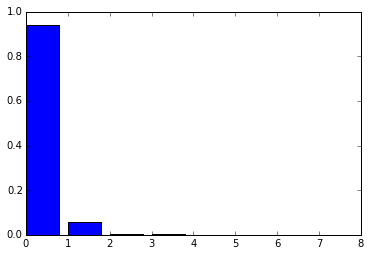

In [446]:
from sklearn.decomposition import PCA
estimator = PCA()
X_pca = estimator.fit_transform(X_train)

plt.figure()
total_variance = sum(estimator.explained_variance_)
varaince_explaned = [1.0*i/total_variance for i in estimator.explained_variance_]

plt.bar(range(len(estimator.explained_variance_)), varaince_explaned)

In [439]:
estimator = PCA(n_components = 1)
X_pca = estimator.fit_transform(X_train)

rgr = LinearRegression()
rgr.fit(X_pca[:,0].reshape(67,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [440]:
X_pca_test = estimator.transform(X_test)
pred =rgr.predict(X_pca_test[:,0].reshape(30,1))

In [441]:
mean_squared_error(np.array(y_test), pred)

0.95527406556190464

In [442]:
estimator = PCA(n_components = 2)
X_pca = estimator.fit_transform(X_train)

rgr = LinearRegression()
rgr.fit(X_pca, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [443]:
X_pca_test = estimator.transform(X_test)
pred =rgr.predict(X_pca_test)

In [444]:
mean_squared_error(np.array(y_test), pred)

1.0005016516952705

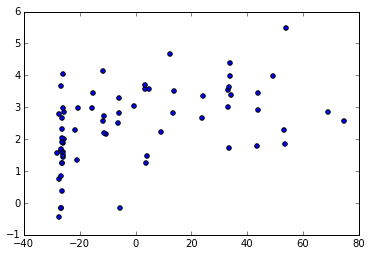

In [453]:
plt.scatter(X_pca[:,0], y_train)

In [451]:
len()

67

In [452]:
len(y_train)

67

# Hw 3 

### Naive Bayes
* I have a bucket with 3 red balls and 7 blue balls in it. I reach into the bucket and grab a ball. What is the proability the ball is red, P(R)? The probability that it's blue, P(B)?

**3/(3+7) = .3**

**7/(3+7) = .7**

* Now assume I have two buckets. Bucket 1, B1, have 5 red and 5 blue balls in it. Bucket 2, B2, has 2 red and 8 blue balls in it. 
    1. I first choose a bucket and then grab a ball. Assuming I choose bucket 1 and bucket 2 with equal probability, what is the probability that the chosen ball is red? blue?
 
**P(R) = P(R|B1)P(B1) + P(R|B2)P(B2) = (.5)(.5) + (.2)(.5)**
 
**P(B) = P(B|B1)P(B1) + P(B|B2)P(B2) = (.5)(.5) + (.8)(.5)**
 
    2. What is the conditional probability that I choose a red ball given B1, P(R|B1)?

** P(R|B1) = .5 ** 

* Let's say we're performing a binary classification problem. We're given a binary class label y and a feature vector X with dimensionality m. Meaning there are m features.
    1. What is Bayes theorem? Write it in terms of X and Y in the way it's used for our classification problem.
 
**$P(Y|X) = \frac{P(X|Y)P(Y)}{P(X)}$ **
    
    2. In this problem we have 4 probabilities, {P(X), P(Y), P(X|Y), P(Y|X)}, which ones do we need to estimate?
    
**We need to estimate P(X|Y) & P(Y) ** 
    
* What is the Naive Bayes assumption? Why do we need to make this assumption?

**The Naive assumption is that all x's are independant given y. P(X1, ... , XN|Y) = P(X1|Y)*...* P(XN|Y) ** 

* We discussed the following 3 different Naive Bayes implementations in SKLearn. When would you use each?
    1. Gaussian? **Assumes the likelihood P(X|Y) is Gaussian **
    2. Bernoulli? **Assumes data has a Bernoulli distribution. Occurances **
    3. Multinomial? **Assumes data has a multinomial distribution. counts **
 
#### Difficult Naive Bayes
Assume Y is boolean class label and X is a feature vector of dimension m so m is the number of features. Assume that each of the m attributes is a boolean. For example, each $x_i$ is 0 if word i isn't present and 1 otherwise. 
* Before the Naive assumption we need to estimate P(X|Y). 
    1. How many total parameters are there? **We have m features, Xs, each is a boolean so there are $2^{m}$ combinations. Y is boolean so the total number of parameters is $2^{m+1}$ **
    2. How many parameters do we need to estimate? **The sum over all Xs in P(X|Y) is 1. Since there are $2^{m}$ possibilities we only need to estimate $2^{m} - 1$. Then we multiply this by two because we have two classes so the total number of parameters to estimate is 2($2^{m}$ - 1)** 
    
    -What is this number for 10, 20, 30, 40, 50 features?
* How many parameters after making the Naive assumptions? **2m**


### Logistic Regression
* What type of machine learning algorithm is logistic regression? **Supervised Learning ** 
* In logistic regression we use the logistic function. What is the logistic function interpretted as? **P(Y|X) **
* What is the assumption of logistic regression? What does the decision boundary look like? **Linear Decision Boundary **


#### Difficult Logistic Regression
* Can you show,  mathematically, the decision classifier of logistic regression?

** We can choose our classfication rule to be 0 if $1 < \frac{P(Y=0|X)}{P(Y=1|X)}$ and 1 otherwise, which class has the highest probability. Remember the equation $P(Y=1|X) = \frac{1}{1+exp(\beta X)}$ is used in logistic regression. By using this for the terms in te ratio cancel out to get $1 < exp(\beta X)$ Taking the natural log of both sides we we 0 < $\beta X$** 

### Clustering
* What type of algorithm is k-means clustering? Supervised or unsupervised? **Unsupervised **
* Does k-means clustering have any parameters? If so what are they? ** K: The number of clusters **
* What are the assumptions of k-means clustering? **Spherical, non-overlapping and well seperated clusters of similar volume and number of points**